# B0 map calculation tutorial

Start by importing the required libraries and defining some settings:

In [1]:
# Ensure `data` and `methods` can be imported
import sys
sys.path.insert(0, '..')

# Other imports
import os                         
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import warnings

# UKRIN-MAPS modules
import data.fetch                  # Test data fetcher
from methods.B0Map import B0Map    # B0 mapping module

# Enable inline plotting; hide T2Star_Nottingham() RuntimeWarnings
%matplotlib inline
warnings.filterwarnings('ignore')

Tell python where to store the B0 map NIfTI file we will generate. We will store it in a directory called `b0_calculation_output` in the `tutorials` directory.

In [2]:
# Initialise output path for T2star map
OUTPUT_DIR = os.path.join(os.getcwd(), "b0_calculation_output")
OUTPUT_PATH = os.path.join(OUTPUT_DIR, 'B0MapGE.nii.gz')

Retrieve B0 test data using our data fetcher.
This will return 4 variables:
* `magnitude`: a 4D array with the magnitude data at all echo times.
* `phase`: a 4D array with the phase data at all echo times.
* `affine`: the affine matrix for the data (needed to later write a new NIfTI file).
* `TEs`: an array containing the echo times, in seconds.

In [3]:
# Fetch test data
magnitude, phase, affine, TEs = data.fetch.b0_ge()

Compute the B0 map using the `B0Map` class implemented in `methods`:

In [4]:
# Compute B0 map
TEs = TEs*1000  # convert TEs to ms
#With Unwrapping
b0 = B0Map(phase, TEs)
#Without Unwrapping
#b0 = B0Map(phase, TEs, unwrap=False)

Display a central slice of the B0 map. Note the units are _rad/s_.

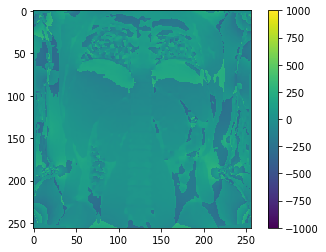

In [5]:
# Display a central slice of the T2star map
b0_central_slice = np.rot90(b0[:,:,6], 1)
ax = plt.subplots()[1]
im = ax.imshow(b0_central_slice, vmin=-1000, vmax=1000)
plt.colorbar(im)
plt.show()

Save the resulting B0 map as a NIfTI file:

In [6]:
# Save result as a new NifTI file
b0_nifti_object = nib.Nifti1Image(b0, affine=affine)
nib.save(b0_nifti_object, OUTPUT_PATH)